# Exploratory Data Analysis for Capstone Two: Music & Happiness

### Table of Contents
* [Introduction](#start)
    * [Import relevant libraries](#import)
* [Features and their definitions](#features)
    * [Features from Spotify data](#featspot)
    * [Features from World Happiness data](#featwh)
* [Summary statistics](#sumstats)
    * [Spotify summary statistics](#spotsumstats)
    * [World Happiness summary statistics](#whsumstats)
* [Cleaning and scaling the data](#cleanscale)
    * [Spotify cleaning & scaling](#spotcleanscale)
    * [World Happiness cleaning & scaling](#whcleanscale)
    * [Create dataframe grouped by country](#dataframecountry)
    * [Merge dataframes](#mergedf)
* [Detecting and analyzing relationships](#relationships)
    * [Correlation matrix](#corrmatrix)
    * [Heatmap of correlation matrix](#corrheatmap)
    * [Scatterplots](#scatterplots)

## 1 - Introduction <a name="start"></a>

Music is a universal language that transcends borders, cultures, and generations. Thanks to platforms like Spotify, we now have access to vast collections of data that capture listeners' musical preferences from across the globe. This data provides a glimpse into millions of users' listening habits and gives us a unique opportunity to analyze how music might be linked to broader societal metrics. In this project, we will be exploring the link between Spotify user metrics from 71 countries and their potential relationship to measures from the 2023 World Happiness Report.

### 1.1 Import relevant libraries <a name="start"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Retrieve variables stored in data wrangling phase
%store -r wh_data
%store -r songs_data_df
%store -r songs_data_stats_country

## 2 - Features and their definitions <a name="features"></a>

Before diving further into our analysis, let's define the features we are analyzing.

### 2.1 Features from Spotify data <a name="featspot"></a>
Our Spotify dataframe, `songs_data_df`, includes the following variables, which we have defined by referring to the [Spotify Web API Reference](https://developer.spotify.com/documentation/web-api/reference/get-audio-features):
- `'popularity'`: A measure of a song's popularity
- `'is_explicit'`: Boolean variable indicating `0` for "Not explicit" and `1` for "Is explicit"
- `'duration_ms'`: The length of a song in milliseconds
- `'danceability'`: A continuous variable measured from 0.0 to 1.0, where 0.0 is least danceable and 1.0 is most danceable.
- `'energy'`: Represents "a perceptual measure of intensity and activity." Measured from 0.0 to 1.0, where 0.0 represents a low energy (slow and quiet) song and 1.0 represents a high energy ("fast, loud, and noisy") song.
- `'loudness'`: The overall loudness of a track in decibels (dB). Generally, the quietest songs are -60 dB while the loudest are 0 dB.
- `'mode'`: Boolean variable indicating the modality of a track, where `0` represents the minor scale and `1` represents the major scale.
- `'speechiness'`: A measure from 0 to 1 detecting "speech-like" recordings. According to the Spotify API documentation, values "above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."
- `'acousticness'`: According to Spotify API documentation, "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."
- `'instrumentalness'`: A measure from 0.0 to 1.0 predicting whether a track contains no vocals. "The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content."
- `'liveness'`: A measure from 0.0 to 1.0 detecting the presence of an audience in the recording. "A value above 0.8 provides strong likelihood that the track is live."
- `'valence'`: A measure from 0.0 to 1.0 "describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive" while "tracks with low valence sound more negative."
- `'tempo'`: "The overall estimated tempo of a track in beats per minute (BPM)."

Our dataframe also includes features `'spotify_id'`, `'name'`, `'album_name'`, `'artists'`, `'album_release_date'`, and `'key'`, and `time_signature`. These features might be helpful in answering interesting questions later on in our analysis (for example, among the happiest countries, who is the most popular artist? Who is the least popular artist?), but we will be ignoring these at this stage in our data analysis.

Something to note is that `valence` is an explicit measure of "positiveness" - i.e. how "happy" a track is. It will be interesting to see whether a meaningful correlation exists between valence and measures of world happiness.

### 2.2 Features from World Happiness data <a name="featwh"></a>
Our World Happiness dataframe, `wh_data`, uses data from the Gallup World Poll (GWP). (See [World Happiness Report 2023](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023) on Kaggle.) To define these features, we will be referencing the statistical appendix of the 2023 World Happiness Report (WHR), which can be found on the official [World Happiness Report website](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf). This dataframe includes the following features:
- `'Ladder score'`: The "ladder score" is the "national average response to the question of life evaluations." This is how each survey respondent answered the question, "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?"
- `'Logged GDP per capita'`: The log of the gross domestic product per capita.
- `'Social support'`: The national average of binary responses (0 or 1) to the GWP question, "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"
- `'Healthy life expectancy'`: Measured in years, based on data from the World Health Organization's Global Health Observatory data repository.
- `'Freedom to make life choices'`: The national average of responses to the GWP question, "Are you satisfied or dissatisfied with your freedom to chose what you do with your life?"
- `'Generosity'`: Per the 2023 WHR report, "generosity is the residual of regerssing national average of response to the GWP question, 'Have you donated money to a charity in the past month?' on GDP per capita."
- `'Perceptions of corruption'`: The national average of survey responses to two questions from the GWP: "Is corruption widespread throughout the government or not?" and "Is corruption widespread within businesses or not?" The answers to these questions are binary (0 or 1) responses, and the overall perception is the average of these two responses.

---

## 3 - Summary statistics <a name="sumstats"></a>
As we mentioned previously, our plan is to merge the Spotify and World Happiness dataframes and see if there is any meaningful relationship between the music people from around the world listen to and their country's measures of happiness. Before we do so, let's look at each dataframe individually to better understand the relationships that exist within them.

### 3.1 Spotify summary statistics <a name="spotsumstats"></a>

In [3]:
songs_data_stats_country.describe()

,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,77.276801,35.445866,193219.917246,0.681272,0.648794,541.255298,-6.524062,0.534050,0.097880,0.280152,0.016218,0.174845,0.538248,122.552343
std,8.044100,17.378441,19766.025183,0.053630,0.055765,46.240373,1.062574,0.136970,0.029010,0.078298,0.019766,0.027499,0.060573,5.272814
min,60.701241,1.812345,159203.971455,0.528786,0.492436,445.201332,-9.305973,0.209615,0.041604,0.129791,0.000269,0.132800,0.384456,107.150022
25%,71.536953,25.213191,183280.282547,0.638776,0.622525,502.331244,-7.217880,0.446043,0.077369,0.230189,0.005881,0.163831,0.496846,119.738508
50%,78.687338,33.628680,191536.411697,0.684108,0.657182,542.268577,-6.649721,0.521762,0.093428,0.261908,0.008954,0.171316,0.521529,122.787306
75%,84.654310,50.284737,200670.653834,0.725679,0.688372,567.613293,-5.607676,0.657472,0.116708,0.303015,0.017209,0.180690,0.585978,125.719276
max,88.562604,73.733793,301910.487293,0.772961,0.771330,647.562610,-4.532248,0.892590,0.191635,0.518471,0.089824,0.364640,0.692424,134.420013


In [4]:
songs_data_stats_country.columns

Index(['country', 'popularity', 'is_explicit', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
features = ['popularity', 'is_explicit', 'duration_ms', 'danceability', 'energy', 'loudness', 'mode', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
corr_matrix_spotify = songs_data_stats_country[features].corr(method='pearson')
corr_matrix_spotify

,popularity,is_explicit,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.219491,0.068455,-0.020827,0.134429,0.361193,0.304451,-0.235720,-0.138420,-0.222902,0.038117,0.081554,-0.063202
is_explicit,0.219491,1.000000,-0.431101,0.621710,0.454658,0.339789,-0.445252,0.649239,-0.444082,-0.031672,-0.044536,0.303986,-0.002232
duration_ms,0.068455,-0.431101,1.000000,-0.325700,-0.285577,-0.244262,0.342309,-0.401447,0.150837,0.083399,-0.183387,-0.266070,-0.009898
danceability,-0.020827,0.621710,-0.325700,1.000000,0.560261,0.462168,-0.607742,0.596009,-0.389995,-0.011584,-0.092423,0.713791,-0.327505
energy,0.134429,0.454658,-0.285577,0.560261,1.000000,0.843364,-0.398927,0.394370,-0.706637,-0.158830,0.221296,0.735457,0.118230
loudness,0.361193,0.339789,-0.244262,0.462168,0.843364,1.000000,-0.189164,0.248045,-0.437354,-0.357782,0.297107,0.719971,0.029617
mode,0.304451,-0.445252,0.342309,-0.607742,-0.398927,-0.189164,1.000000,-0.596895,0.153799,-0.011009,-0.006806,-0.434387,0.259000
speechiness,-0.235720,0.649239,-0.401447,0.596009,0.394370,0.248045,-0.596895,1.000000,-0.122462,0.029645,0.073313,0.294285,-0.010658
acousticness,-0.138420,-0.444082,0.150837,-0.389995,-0.706637,-0.437354,0.153799,-0.122462,1.000000,-0.111547,0.032775,-0.381810,-0.210527
instrumentalness,-0.222902,-0.031672,0.083399,-0.011584,-0.158830,-0.357782,-0.011009,0.029645,-0.111547,1.000000,-0.039214,-0.317706,-0.022258


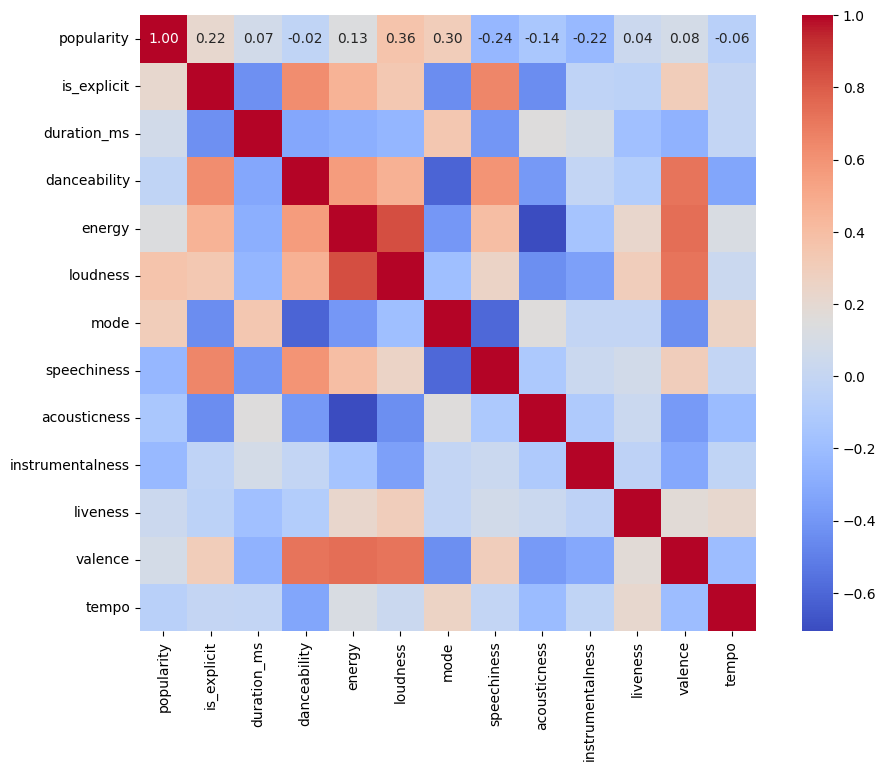

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_spotify, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.show()

#### Observations (based on correlation matrix heat map)
- Popularity is positively correlated with mode and strongly negatively correlated with speechiness. (Popular music tends to be in the major key.)
- Explicitness is negatively correlated with duration, mode, and acousticness, and positively correlated with danceability and speechiness. (Music containing explicit lyrics tends to be shorter, in the minor key, and less acoustic. It is also more danceable and tends to feature more sections of spoken words.)
- Duration is negatively correlated with speechiness and slightly positively correlated with mode and acousticness. (Longer songs tend to be acoustic and in the major key.)
- Danceability is positively correlated with energy, loudness, and speechiness. It is negatively correlated with acousticness, and strongly negatively correlated with mode. (Danceable songs tend to be energetic, loud, and in the minor key.)
- Energy is positively correlated with loudness and valence. It is negatively correlated with mode, and strongly negatively correlated with acousticness. (Energetic music tends to be loud, positive, in the major key, and not acoustic.)
- Loudness is negatively correlated with acousticness and instrumentalness. It is positively correlated with valence. (Loud music tends to not be acoustic or instrumental. Loud music also tends to be positive.)

### 3.2 World Happiness summary statistics <a name="whsumstats"></a>

In [7]:
wh_data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,6.217845,0.054507,6.324577,6.111028,10.117408,0.864606,68.046803,0.831859,0.005394,0.668056,1.778000e+00,1.646380,1.321718,0.450070,0.599155,0.139352,0.186986,1.874211
std,0.820947,0.015390,0.806882,0.835822,0.963200,0.083796,4.191286,0.087261,0.137601,0.215176,2.459875e-15,0.345445,0.211690,0.114175,0.115999,0.073801,0.154086,0.436908
min,4.036000,0.029000,4.092000,3.980000,5.527000,0.553000,54.891000,0.475000,-0.240000,0.146000,1.778000e+00,0.000000,0.535000,0.092000,0.125000,0.008000,0.000000,0.535000
25%,5.711000,0.043000,5.824000,5.598500,9.494000,0.819000,65.656000,0.794500,-0.084000,0.551000,1.778000e+00,1.422500,1.206500,0.385000,0.550000,0.091500,0.067000,1.698000
50%,6.260000,0.052000,6.408000,6.131000,10.353000,0.884000,68.950000,0.852000,-0.016000,0.736000,1.778000e+00,1.731000,1.370000,0.475000,0.626000,0.128000,0.139000,1.872000
75%,6.820500,0.063000,6.901500,6.736500,10.782500,0.927000,71.250000,0.891000,0.094000,0.835500,1.778000e+00,1.884500,1.479000,0.537000,0.678000,0.187000,0.271500,2.114000
max,7.804000,0.108000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [8]:
wh_data.columns

Index(['country', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'region'],
      dtype='object')

In [9]:
features = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
corr_matrix_wh = wh_data[features].corr(method='pearson')
corr_matrix_wh

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.674924,0.754646,0.624083,0.501799,0.230818,-0.593956
Logged GDP per capita,0.674924,1.000000,0.579288,0.691783,0.239335,0.055557,-0.548235
Social support,0.754646,0.579288,1.000000,0.557238,0.228709,0.197036,-0.331210
Healthy life expectancy,0.624083,0.691783,0.557238,1.000000,0.076968,-0.006612,-0.530312
Freedom to make life choices,0.501799,0.239335,0.228709,0.076968,1.000000,0.338650,-0.408761
Generosity,0.230818,0.055557,0.197036,-0.006612,0.338650,1.000000,-0.284102
Perceptions of corruption,-0.593956,-0.548235,-0.331210,-0.530312,-0.408761,-0.284102,1.000000


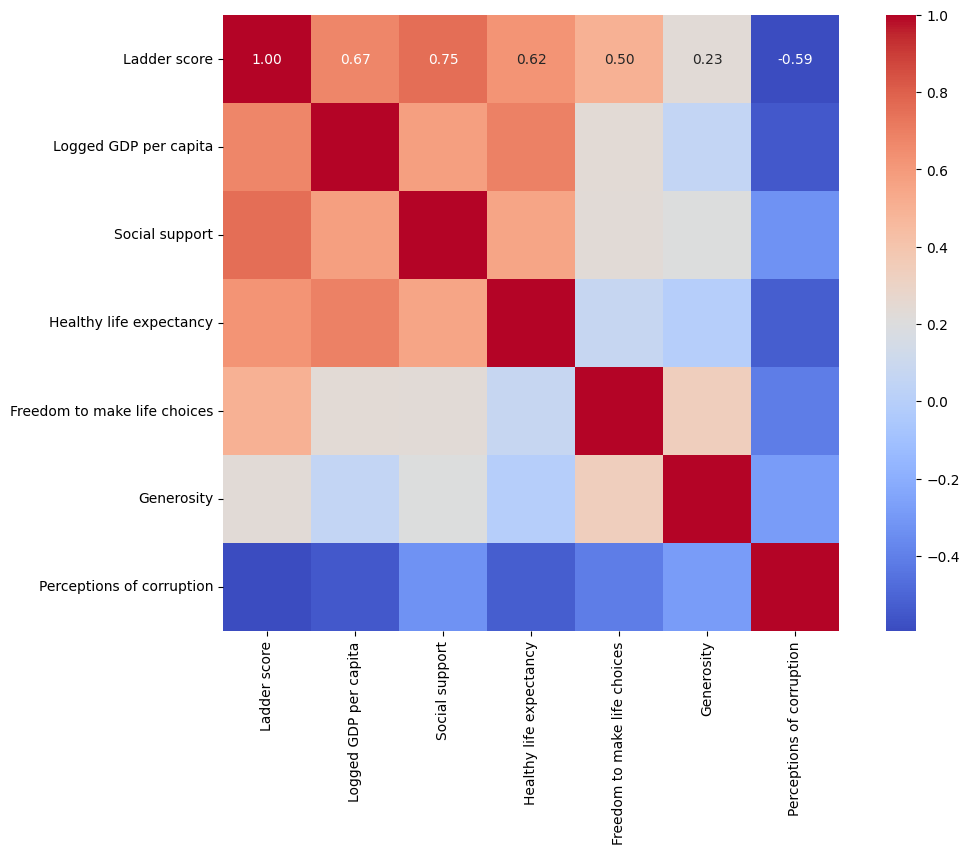

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_wh, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.show()

#### Observations
- Ladder score is positively correlated with GDP per capita, social support, life expectancy, freedom to make life choices, and generosity. It is strongly negatively correlated with perceptions of corruption.
- Social support is positively correlated with GDP per capita and life expectancy. It is negatively correlated with perceptions of corruption.
- Life expectancy is strongly negatively correlated with perceptions of corruption.
- Freedom to make life choices is positively correlated with generosity and negatively correlated with perceptions of corruption.
- Generosity is negatively correlated with perceptions of corruption.

---

## 4 - Cleaning and scaling the data <a name="cleanscale"></a>
We have already performed some preliminary cleaning in a previous phase of our data analysis. However, since each of these features uses different measurements, it might be helpful for us to scale the data so we can more easily compare and interpret the data.

To get an idea of how to scale the data, let's look at the minimum and maximum values of each variable in each dataframe.

### 4.1 Spotify data <a name="spotcleanscale"></a>
Since `is_explicit` and `mode` are Boolean values, we already know the minimum and maximum values. We will leave these values as they are for now.

In [11]:
# Let's look at the minimum and maximum of each numerical variable in the Spotify dataframe.
columns_sp = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
for column in songs_data_df[columns_sp]:
    print(f"Max {column}: {max(songs_data_df[column])}\nMin {column}: {min(songs_data_df[column])}\n---")

Max popularity: 100.0
Min popularity: 0.0
---
Max duration_ms: 939666
Min duration_ms: 0
---
Max danceability: 0.988
Min danceability: 0.0
---
Max energy: 0.997
Min energy: 2.01e-05
---
Max loudness: 2.006
Min loudness: -31.356
---
Max speechiness: 0.921
Min speechiness: 0.0
---
Max acousticness: 0.996
Min acousticness: 7.53e-06
---
Max instrumentalness: 0.974
Min instrumentalness: 0.0
---
Max liveness: 0.978
Min liveness: 0.0145
---
Max valence: 0.992
Min valence: 0.0
---
Max tempo: 217.969
Min tempo: 0.0
---


#### Scaling for Spotify
It looks like we will need to scale `popularity`, `duration_ms`, `loudness`, and `tempo`.

We will scale them using the min-max scaling formula and treat them as percentages.

In [12]:
columns_to_rescale = ['popularity', 'duration_ms', 'loudness', 'tempo']
min_values = {
    'popularity': min(songs_data_df['popularity']),
    'duration_ms': min(songs_data_df['duration_ms']),
    'loudness': min(songs_data_df['loudness']),
    'tempo': min(songs_data_df['tempo'])
}

max_values = {
    'popularity': max(songs_data_df['popularity']),
    'duration_ms': max(songs_data_df['duration_ms']),
    'loudness': max(songs_data_df['loudness']),
    'tempo': max(songs_data_df['tempo'])
}

In [13]:
# Create a copy of songs_data_df for scaled data
songs_data_df_scaled = songs_data_df

for column in columns_to_rescale:
    min_val = min_values[column]
    max_val = max_values[column]
    songs_data_df_scaled[column] = (songs_data_df_scaled[column] - min_val) / (max_val - min_val)

Let's double check the minimum and maximum for each variable in our Spotify dataset:

In [14]:
# Let's look at the minimum and maximum of each numerical variable in the Spotify dataframe.
columns_sp = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
for column in songs_data_df_scaled[columns_sp]:
    print(f"Max {column}: {max(songs_data_df_scaled[column])}\nMin {column}: {min(songs_data_df_scaled[column])}\n---")

Max popularity: 1.0
Min popularity: 0.0
---
Max duration_ms: 1.0
Min duration_ms: 0.0
---
Max danceability: 0.988
Min danceability: 0.0
---
Max energy: 0.997
Min energy: 2.01e-05
---
Max loudness: 1.0
Min loudness: 0.0
---
Max speechiness: 0.921
Min speechiness: 0.0
---
Max acousticness: 0.996
Min acousticness: 7.53e-06
---
Max instrumentalness: 0.974
Min instrumentalness: 0.0
---
Max liveness: 0.978
Min liveness: 0.0145
---
Max valence: 0.992
Min valence: 0.0
---
Max tempo: 1.0
Min tempo: 0.0
---


### 4.2 World Happiness data <a name="whcleanscale"></a>

In [15]:
# Let's look at the minimum and maximum of each numerical variable in the World Happiness dataframe.
columns_wh = ['Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
for column in wh_data[columns_wh]:
    print(f"Max {column}: {max(wh_data[column])}\nMin {column}: {min(wh_data[column])}\n---")

Max Ladder score: 7.804
Min Ladder score: 4.036
---
Max Logged GDP per capita: 11.66
Min Logged GDP per capita: 5.527
---
Max Social support: 0.983
Min Social support: 0.553
---
Max Healthy life expectancy: 77.28
Min Healthy life expectancy: 54.891
---
Max Freedom to make life choices: 0.961
Min Freedom to make life choices: 0.475
---
Max Generosity: 0.531
Min Generosity: -0.24
---
Max Perceptions of corruption: 0.929
Min Perceptions of corruption: 0.146
---


#### Scaling for World Happiness Data
It looks like we will need to scale `Logged GDP per capita`, `Healthy life expectancy`, and `Generosity`.

Again, we will scale them using the min-max scaling formula and treat them as percentages.

In [16]:
# First, let's copy the dataframe and clean the names a little bit for consistency:
wh_data_scaled = wh_data[['country', 'region', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
columns_to_rename = {'Ladder score': 'ladder_score', 'Logged GDP per capita': 'gdp_per_capita', 
                     'Social support': 'social_support', 'Healthy life expectancy': 'life_expectancy', 
                     'Freedom to make life choices': 'life_choice_freedom', 'Generosity': 'generosity',
                    'Perceptions of corruption': 'corruption'}
wh_data_scaled = wh_data_scaled.rename(columns_to_rename, axis='columns')

In [17]:
columns_to_rescale = ['gdp_per_capita', 'life_expectancy', 'generosity']
min_values = {
    'gdp_per_capita': min(wh_data_scaled['gdp_per_capita']),
    'life_expectancy': min(wh_data_scaled['life_expectancy']),
    'generosity': min(wh_data_scaled['generosity'])
}

max_values = {
    'gdp_per_capita': max(wh_data_scaled['gdp_per_capita']),
    'life_expectancy': max(wh_data_scaled['life_expectancy']),
    'generosity': max(wh_data_scaled['generosity'])
}

In [18]:
for column in columns_to_rescale:
    min_val = min_values[column]
    max_val = max_values[column]
    wh_data_scaled[column] = (wh_data_scaled[column] - min_val) / (max_val - min_val)

Let's scale the ladder score as a percentage as well.

In [19]:
wh_data_scaled['ladder_score'] = wh_data_scaled['ladder_score']/10

Let's double check the mininum and maximum for each variable:

In [20]:
# Let's look at the minimum and maximum of each numerical variable in the World Happiness dataframe.
columns_wh = ['ladder_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'life_choice_freedom', 
              'generosity', 'corruption']
for column in wh_data_scaled[columns_wh]:
    print(f"Max {column}: {max(wh_data_scaled[column])}\nMin {column}: {min(wh_data_scaled[column])}\n---")

Max ladder_score: 0.7804
Min ladder_score: 0.40359999999999996
---
Max gdp_per_capita: 1.0
Min gdp_per_capita: 0.0
---
Max social_support: 0.983
Min social_support: 0.553
---
Max life_expectancy: 1.0
Min life_expectancy: 0.0
---
Max life_choice_freedom: 0.961
Min life_choice_freedom: 0.475
---
Max generosity: 1.0
Min generosity: 0.0
---
Max corruption: 0.929
Min corruption: 0.146
---


### 4.3 Create dataframe summarizing songs data grouped by country <a name="dataframecountry"></a>
Let's create a dataframe from our `songs_data_df_scaled` dataframe to summarize the songs data by country.

Recall that we had two Boolean variables in our Spotify data: `is_explicit` and `mode`. When we summarize our songs data by country, we will treat these as percentages, where `is_explicit` will indicate the percentage of songs each country listens to that are explicit, and `mode` will indicate the percentage of songs each country listens to that are in the major key.

In [21]:
songs_data_df_scaled.columns

Index(['country', 'region', 'spotify_id', 'name', 'artists', 'country_code',
       'popularity', 'is_explicit', 'duration_ms', 'album_name',
       'album_release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [22]:
# Drop columns
drop_cols = ['spotify_id', 'name', 'artists', 'country_code', 'album_name', 'album_release_date']
songs_data_stats_country = songs_data_df_scaled.drop(drop_cols, axis='columns')
songs_data_stats_country.head()

,country,region,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,South Africa,Sub Saharan Africa,0.572000,False,0.402185,0.900,0.610,1,0.552095,0,0.0847,0.08790,0.01630,0.1240,0.786,0.518679,4
1,South Africa,Sub Saharan Africa,0.786667,True,0.408272,0.831,0.643,1,0.789941,1,0.1100,0.04600,0.00000,0.0840,0.142,0.642055,4
2,South Africa,Sub Saharan Africa,0.703906,False,0.415041,0.857,0.564,4,0.597356,0,0.0566,0.01030,0.17800,0.0187,0.505,0.513899,4
3,South Africa,Sub Saharan Africa,0.685659,False,0.373750,0.806,0.767,6,0.649541,0,0.1120,0.17900,0.00126,0.1820,0.795,0.518427,4
4,South Africa,Sub Saharan Africa,0.571538,False,0.303335,0.845,0.584,1,0.711258,1,0.0477,0.00141,0.05950,0.0661,0.400,0.513734,4


In [23]:
# Define a function calculate_percentage.
def calculate_percentage(series):
    return series.mean() * 100

In [24]:
# Create a dataframe for countries
songs_data_stats_country = songs_data_df.groupby('country').agg({
    'popularity': 'mean',
    'is_explicit': calculate_percentage,
    'duration_ms': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': lambda x: x.mode(), # Since key is a categorical variable
    'loudness': 'mean',
    'mode': calculate_percentage,
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'time_signature': lambda x: x.mode() # Since time signature is also categorical
}).reset_index()

# While we are at it, we will also create a dataframe for regions
songs_data_stats_region = songs_data_df_scaled.drop('country', axis='columns').groupby('region').agg({
    'popularity': 'mean',
    'is_explicit': calculate_percentage,
    'duration_ms': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': lambda x: x.mode(),
    'loudness': 'mean',
    'mode': calculate_percentage,
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'time_signature': lambda x: x.mode()[0]  # Mode
}).reset_index()

In [25]:
# Let's also create a dataframe grouping world happiness data by region:
wh_data_scaled_byregion = wh_data_scaled.drop('country', axis='columns').groupby('region').mean().reset_index()

### 4.4 Merge data frames <a name="mergedf"></a>
Now that we have scaled the data, let's merge the two dataframes.

In [26]:
# Join wh_data_scaled with songs_data_stats_country
wh_songs_country = pd.merge(wh_data_scaled, songs_data_stats_country, on='country', how='inner')

# Join wh_data_scaled with songs_data_stats_region
wh_songs_region = pd.merge(wh_data_scaled_byregion, songs_data_stats_region, on='region', how='inner')

In [27]:
wh_songs_country

,country,region,ladder_score,gdp_per_capita,social_support,life_expectancy,life_choice_freedom,generosity,corruption,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Finland,Western Europe,0.7804,0.858471,0.969,0.726205,0.961,0.286641,0.182,0.542417,...,1,0.741491,48.306998,0.089191,0.233652,0.024481,0.181476,0.535247,0.563186,4
1,Denmark,Western Europe,0.7586,0.886189,0.954,0.730671,0.934,0.485084,0.196,0.579685,...,0,0.739056,57.179487,0.125419,0.222061,0.007216,0.180748,0.546418,0.569677,4
2,Iceland,Western Europe,0.7530,0.875428,0.983,0.766403,0.936,0.584955,0.668,0.461190,...,1,0.689544,63.111111,0.099560,0.287092,0.030793,0.184685,0.454426,0.557579,4
3,Israel,Middle East and North Africa,0.7473,0.833524,0.943,0.795301,0.809,0.281453,0.708,0.503162,...,"[0, 11]",0.687054,48.582996,0.073603,0.423747,0.003895,0.193327,0.460201,0.570813,4
4,Netherlands,Western Europe,0.7403,0.882928,0.930,0.744071,0.887,0.587549,0.379,0.650881,...,0,0.724379,60.651629,0.101596,0.281541,0.009245,0.182982,0.528320,0.563488,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Morocco,Middle East and North Africa,0.4903,0.561878,0.553,0.402430,0.787,0.011673,0.811,0.550466,...,1,0.699422,32.467532,0.167014,0.366583,0.007040,0.152827,0.499680,0.552725,4
67,Turkey,Middle East and North Africa,0.4614,0.779390,0.796,0.615123,0.475,0.211414,0.795,0.655928,...,11,0.710955,30.049261,0.098563,0.263776,0.006844,0.186728,0.527000,0.559219,4
68,Pakistan,South and South East Asia,0.4555,0.491277,0.601,0.108178,0.766,0.321660,0.787,0.655616,...,1,0.708107,53.233831,0.097716,0.406587,0.007075,0.152486,0.495555,0.504157,4
69,Egypt,Middle East and North Africa,0.4170,0.626121,0.726,0.384653,0.732,0.073930,0.580,0.533685,...,2,0.744931,34.444444,0.096338,0.382261,0.017005,0.175063,0.596143,0.544409,4


In [28]:
wh_songs_region

,region,ladder_score,gdp_per_capita,social_support,life_expectancy,life_choice_freedom,generosity,corruption,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,East Asia,0.598075,0.854557,0.851750,0.840982,0.751750,0.169261,0.601750,0.678969,9.907834,...,0,0.755597,71.658986,0.071174,0.279911,0.007399,0.171632,0.525675,0.572987,4
1,Eastern Europe,0.621055,0.777078,0.924636,0.560283,0.816273,0.284872,0.804000,0.577605,43.885242,...,1,0.722875,56.990032,0.113748,0.245855,0.031295,0.190615,0.487095,0.572409,4
2,Latin America,0.598067,0.614707,0.838667,0.525603,0.837722,0.249171,0.778056,0.660450,41.290913,...,1,0.765329,53.650721,0.110937,0.271825,0.008668,0.180260,0.601071,0.550512,4
3,Middle East and North Africa,0.569900,0.760476,0.788000,0.521536,0.773167,0.203415,0.694833,0.614598,29.784455,...,1,0.717636,47.615937,0.102766,0.321588,0.022399,0.180843,0.501194,0.554402,4
4,South and South East Asia,0.544950,0.656795,0.770625,0.432478,0.875750,0.482977,0.717750,0.710793,12.334294,...,0,0.721080,68.991354,0.069801,0.361839,0.010198,0.164476,0.496049,0.549986,4
5,Sub Saharan Africa,0.512800,0.564161,0.823500,0.046853,0.724000,0.302205,0.906500,0.540456,40.875912,...,1,0.697437,56.788321,0.132755,0.241694,0.038967,0.171191,0.511428,0.540853,4
6,Western Europe,0.696983,0.872747,0.913278,0.744999,0.858500,0.361579,0.476444,0.611907,38.437295,...,1,0.724709,56.835194,0.116423,0.271236,0.014895,0.180778,0.508180,0.564270,4
7,Western Offshoots,0.701825,0.864014,0.933500,0.659766,0.862750,0.526265,0.469000,0.725008,39.926063,...,0,0.719604,69.624153,0.092343,0.292808,0.010782,0.192656,0.479456,0.565098,4


---

## Detecting and analyzing relationships <a name="relationships"></a>

Let's create a correlation matrix. We will be using the Pearson method.

### Correlation matrix <a name="corrmatrix"></a>

In [29]:
wh_songs_country.columns

Index(['country', 'region', 'ladder_score', 'gdp_per_capita', 'social_support',
       'life_expectancy', 'life_choice_freedom', 'generosity', 'corruption',
       'popularity', 'is_explicit', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [30]:
features = ['ladder_score', 'gdp_per_capita', 'social_support',
            'life_expectancy', 'life_choice_freedom', 'generosity', 'corruption', 
            'popularity', 'is_explicit', 'duration_ms', 'danceability', 'energy',
            'loudness', 'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
corr_matrix = wh_songs_country[features].corr(method='pearson')
corr_matrix

,ladder_score,gdp_per_capita,social_support,life_expectancy,life_choice_freedom,generosity,corruption,popularity,is_explicit,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
ladder_score,1.000000,0.674924,0.754646,0.624083,0.501799,0.230818,-0.593956,-0.057379,0.194083,-0.256451,-0.283615,-0.152619,-0.142125,0.240398,-0.055820,-0.298481,-0.005816,0.291130,-0.261662,0.398835
gdp_per_capita,0.674924,1.000000,0.579288,0.691783,0.239335,0.055557,-0.548235,-0.034826,-0.020210,-0.168276,-0.454414,-0.183844,-0.234713,0.210176,-0.075662,-0.198935,0.082379,0.277480,-0.416841,0.441336
social_support,0.754646,0.579288,1.000000,0.557238,0.228709,0.197036,-0.331210,-0.141392,0.207201,-0.217230,-0.224777,-0.017412,-0.088779,0.209116,-0.037039,-0.440659,0.236671,0.392362,-0.261850,0.472934
life_expectancy,0.624083,0.691783,0.557238,1.000000,0.076968,-0.006612,-0.530312,-0.007118,0.009449,-0.231827,-0.295250,0.063802,0.079874,0.127999,-0.075978,-0.238249,-0.215588,0.155824,-0.123458,0.457021
life_choice_freedom,0.501799,0.239335,0.228709,0.076968,1.000000,0.338650,-0.408761,0.208335,-0.111737,0.082814,-0.182162,-0.246657,-0.006998,0.383113,-0.284325,0.083646,0.127923,0.013001,-0.102322,0.065345
generosity,0.230818,0.055557,0.197036,-0.006612,0.338650,1.000000,-0.284102,0.266752,-0.235253,0.100142,-0.473203,-0.400597,-0.248537,0.545558,-0.387902,0.225322,0.100009,0.108120,-0.384555,0.045618
corruption,-0.593956,-0.548235,-0.331210,-0.530312,-0.408761,-0.284102,1.000000,-0.087589,0.171666,0.078995,0.330991,0.142267,0.133574,-0.202065,0.176420,0.075459,0.049999,-0.070945,0.179021,-0.218142
popularity,-0.057379,-0.034826,-0.141392,-0.007118,0.208335,0.266752,-0.087589,1.000000,-0.291916,0.319233,-0.237827,0.003426,0.303814,0.466225,-0.563479,0.147906,-0.253774,-0.173377,0.155305,-0.092165
is_explicit,0.194083,-0.020210,0.207201,0.009449,-0.111737,-0.235253,0.171666,-0.291916,1.000000,-0.486599,0.541159,0.294787,0.041841,-0.449837,0.754692,-0.462043,0.043665,0.053332,0.141452,0.030850
duration_ms,-0.256451,-0.168276,-0.217230,-0.231827,0.082814,0.100142,0.078995,0.319233,-0.486599,1.000000,-0.388695,-0.344151,-0.141331,0.460256,-0.522818,0.350823,-0.112370,-0.268266,-0.174639,-0.163202


### Heatmap of correlation matrix <a name="corrheatmap"></a>

To better visualize these relationships, let's create a heatmap of the correlation matrix:

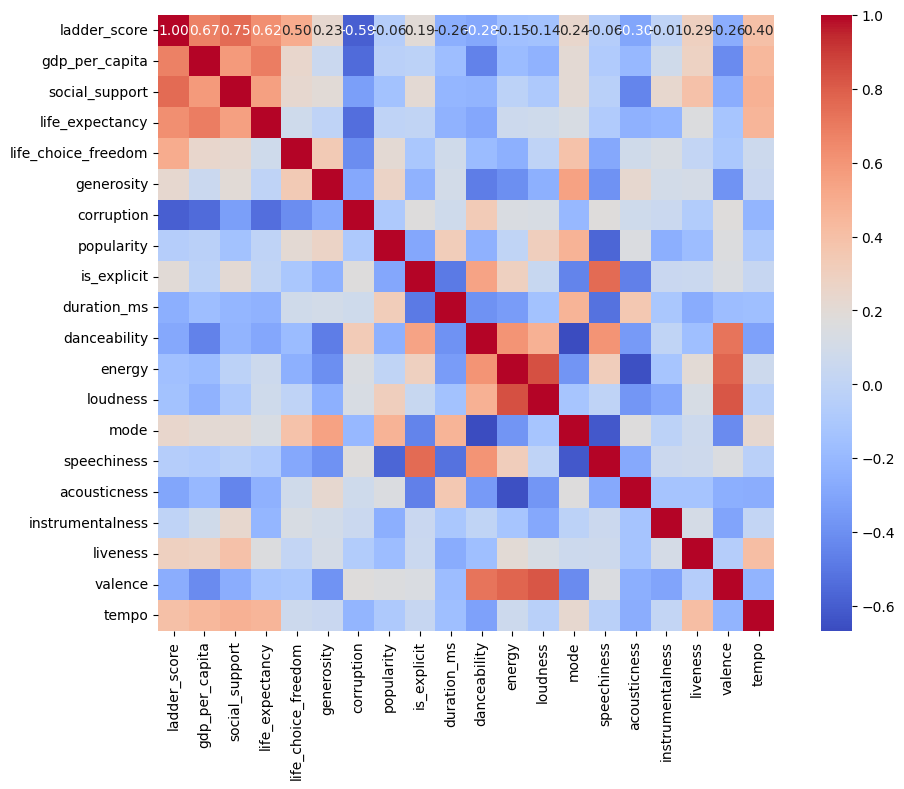

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.show()

#### Observations
- Explicitness is negatively correlated with generosity.
- Danceability is negatively correlated with both GDP per capita and generosity. It is positively associated with perceptions of corruption.
- Energy is negatively correlated with generosity.
- Mode is positively correlated with life choice freedom and generosity.
- Speechiness is negatively correlated with life choice freedom and generosity.
- Acousticness is negatively associated with social support.
- Instrumentalness is negatively correlated with life expectancy.
- Liveness is positively correlated with social support.
- Valence is negatively correlated with GDP per capita and generosity.
- Tempo is positively correlated with ladder score, GDP per capita, social support, and life expectancy.

### Scatterplots <a name="scatterplots"></a>
We have uncovered some interesting observations. Let's create scatterplots to visualize some of the relationships we have identified.

On each scatterplot, we will also include the names of the 5 "key" countries possessing the strongest correlations between the two variables in question.

#### GDP per capita vs. danceability
Danceability is negatively correlated with GDP per capita, indicating less wealthy countries tend to listen to more danceable music.

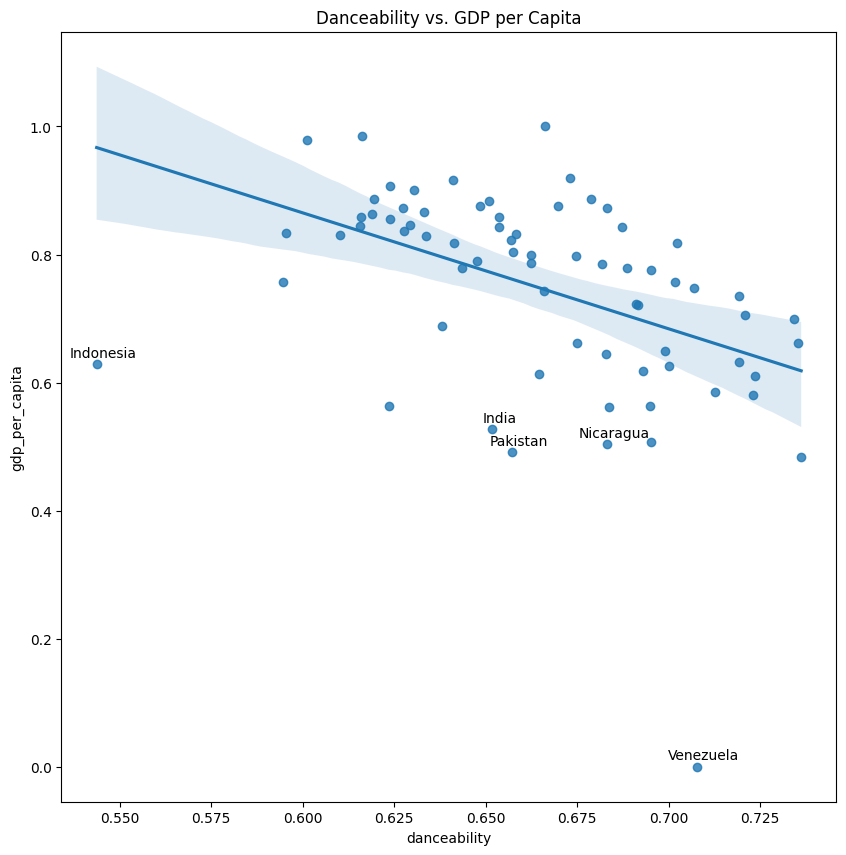

In [41]:
key_countries1 = wh_songs_country.assign(product=wh_songs_country['danceability'] * wh_songs_country['gdp_per_capita']) \
                                 .sort_values(by='product', ascending=True).head(5)
plt.figure(figsize=(10, 10))

sns.regplot(x='danceability', y='gdp_per_capita', data=wh_songs_country, scatter=True)

for i in range(len(key_countries1)):
    plt.annotate(key_countries1.iloc[i]['country'], 
                 (key_countries1.iloc[i]['danceability'], key_countries1.iloc[i]['gdp_per_capita']),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Danceability vs. GDP per Capita')
plt.show()

#### Generosity vs. energy
Energy is negatively correlated with generosity, indicating that less generous countries tend to listen to more energetic music.

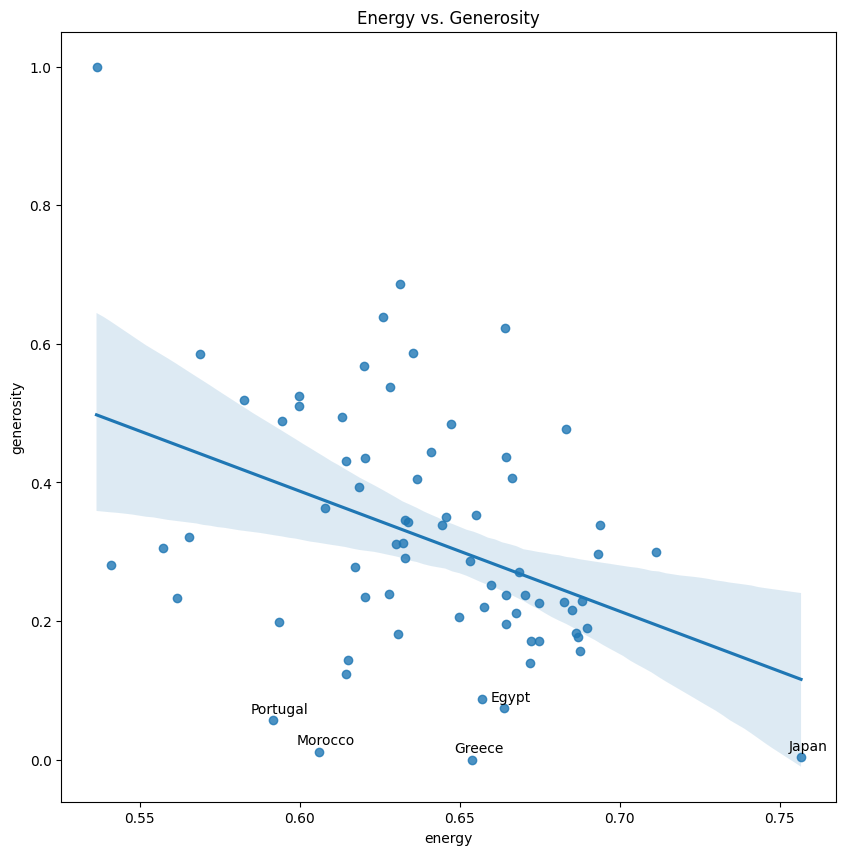

In [42]:
key_countries2 = wh_songs_country.assign(product=wh_songs_country['energy'] * wh_songs_country['generosity']) \
                                 .sort_values(by='product', ascending=True).head(5)
plt.figure(figsize=(10, 10))

sns.regplot(x='energy', y='generosity', data=wh_songs_country, scatter=True)

for i in range(len(key_countries2)):
    plt.annotate(key_countries2.iloc[i]['country'], 
                 (key_countries2.iloc[i]['energy'], key_countries2.iloc[i]['generosity']),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Energy vs. Generosity')
plt.show()

#### Life choice freedom vs. mode
We observed that mode is positively correlated with life choice freedom, meaning that countries who listen to music in the major key tend to be more satisfied with the freedom of choice that is available to them.

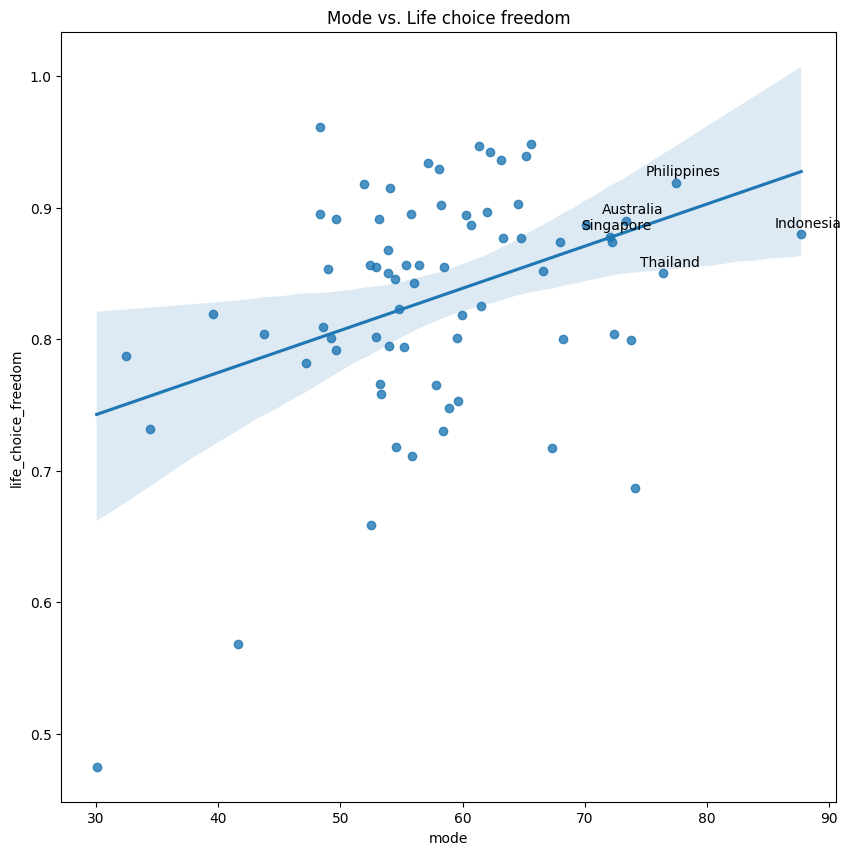

In [43]:
key_countries3 = wh_songs_country.assign(product=wh_songs_country['mode'] * wh_songs_country['life_choice_freedom']) \
                                 .sort_values(by='product', ascending=False).head(5)
plt.figure(figsize=(10, 10))

sns.regplot(x='mode', y='life_choice_freedom', data=wh_songs_country, scatter=True)

for i in range(len(key_countries3)):
    plt.annotate(key_countries3.iloc[i]['country'], 
                 (key_countries3.iloc[i]['mode'], key_countries3.iloc[i]['life_choice_freedom']),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Mode vs. Life choice freedom')
plt.show()

#### GDP per capita vs. valence
Valence is negatively correlated with GDP per capita, meaning that wealthier countries tend to listen to less positive music. This is surprising, considering valence is an explicit measure of how "happy" a song is!

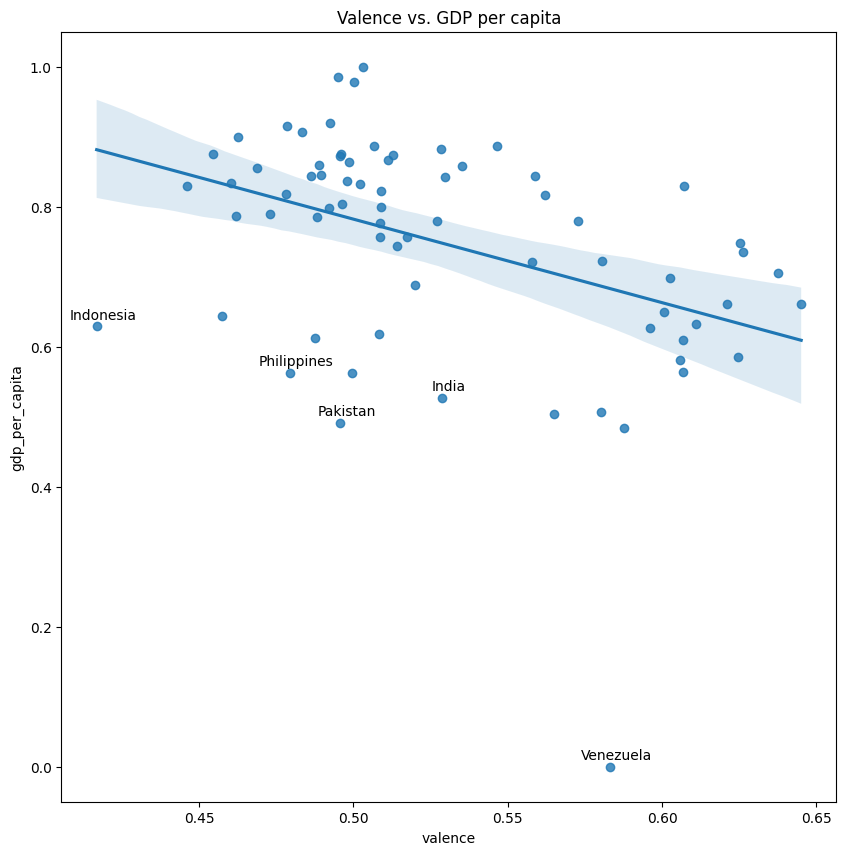

In [45]:
key_countries4 = wh_songs_country.assign(product=wh_songs_country['valence'] * wh_songs_country['gdp_per_capita']) \
                                 .sort_values(by='product', ascending=True).head(5)
plt.figure(figsize=(10, 10))

sns.regplot(x='valence', y='gdp_per_capita', data=wh_songs_country, scatter=True)

for i in range(len(key_countries4)):
    plt.annotate(key_countries4.iloc[i]['country'], 
                 (key_countries4.iloc[i]['valence'], key_countries4.iloc[i]['gdp_per_capita']),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Valence vs. GDP per capita')
plt.show()

Let's store our scaled dataframes for later use: